#### Enrique Chi Gongora
#### Machine Learning
#### Support Vector Machine

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('Dinosaur.csv', index_col=0, encoding='latin-1')
df

,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
ï»¿Lat,,,,,,,,,,,,,,,
42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


In [3]:
selected_columns = ['Lng', 'Formation', 'Geological Interval', 'Geological Time Period', 'Max Ma', 'Min Ma', 'Diet']
df = df[selected_columns]
dataset = df.copy()
dataset

,Lng,Formation,Geological Interval,Geological Time Period,Max Ma,Min Ma,Diet
ï»¿Lat,,,,,,,
42.933300,123.966698,Tuchengzi,Tithonian,Jurassic,150.8,132.90,herbivore
41.799999,120.733330,Yixian,Barremian,Cretaceous,130.0,122.46,omnivore
41.799999,120.733330,Yixian,Barremian,Cretaceous,130.0,122.46,omnivore
50.740726,-111.528732,Dinosaur Park,Campanian,Cretaceous,83.5,70.60,carnivore
50.737015,-111.549347,Dinosaur Park,Campanian,Cretaceous,83.5,70.60,carnivore
...,...,...,...,...,...,...,...
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore


In [4]:
# Handle missing values
mode_value = dataset['Formation'].mode()[0]
dataset['Formation'].fillna(mode_value, inplace=True)

# Check for null values in the DataFrame
null_values = dataset.isnull()

# Show if there is any null value in each column
print("Are there any null values in any column?")
print(null_values.any())

# Show the number of null values in each column
print("\nNumber of null values in each column:")
print(null_values.sum())


Are there any null values in any column?
Lng                       False
Formation                 False
Geological Interval       False
Geological Time Period    False
Max Ma                    False
Min Ma                    False
Diet                      False
dtype: bool

Number of null values in each column:
Lng                       0
Formation                 0
Geological Interval       0
Geological Time Period    0
Max Ma                    0
Min Ma                    0
Diet                      0
dtype: int64


In [5]:
# Encode categorical variables
label_encoder_formation = LabelEncoder()
label_encoder_geological_interval = LabelEncoder()
label_encoder_geological_time_period = LabelEncoder()
label_encoder_diet = LabelEncoder()

dataset['Formation_num'] = label_encoder_formation.fit_transform(dataset['Formation'])
dataset['Geological_Interval'] = label_encoder_geological_interval.fit_transform(dataset['Geological Interval'])
dataset['Geological_Time_Period'] = label_encoder_geological_time_period.fit_transform(dataset['Geological Time Period'])
dataset['Diet_num'] = label_encoder_diet.fit_transform(dataset['Diet'])
dataset

,Lng,Formation,Geological Interval,Geological Time Period,Max Ma,Min Ma,Diet,Formation_num,Geological_Interval,Geological_Time_Period,Diet_num
ï»¿Lat,,,,,,,,,,,
42.933300,123.966698,Tuchengzi,Tithonian,Jurassic,150.8,132.90,herbivore,176,27,1,2
41.799999,120.733330,Yixian,Barremian,Cretaceous,130.0,122.46,omnivore,203,4,0,4
41.799999,120.733330,Yixian,Barremian,Cretaceous,130.0,122.46,omnivore,203,4,0,4
50.740726,-111.528732,Dinosaur Park,Campanian,Cretaceous,83.5,70.60,carnivore,41,8,0,0
50.737015,-111.549347,Dinosaur Park,Campanian,Cretaceous,83.5,70.60,carnivore,41,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore,141,8,0,5
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore,141,8,0,5
49.183334,-98.099998,Pierre Shale,Campanian,Cretaceous,83.5,70.60,piscivore,141,8,0,5


In [6]:
# Prepare data for training
features = ['Lng', 'Max Ma', 'Min Ma', 'Formation_num', 'Geological_Interval', 'Diet_num']
X = dataset[features]
y = dataset['Geological_Time_Period']

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_model = SVC(kernel='linear', C=1, gamma=0.1)
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate the model
correct_predictions = np.sum(predictions == y_test)
accuracy = correct_predictions / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9979716024340771


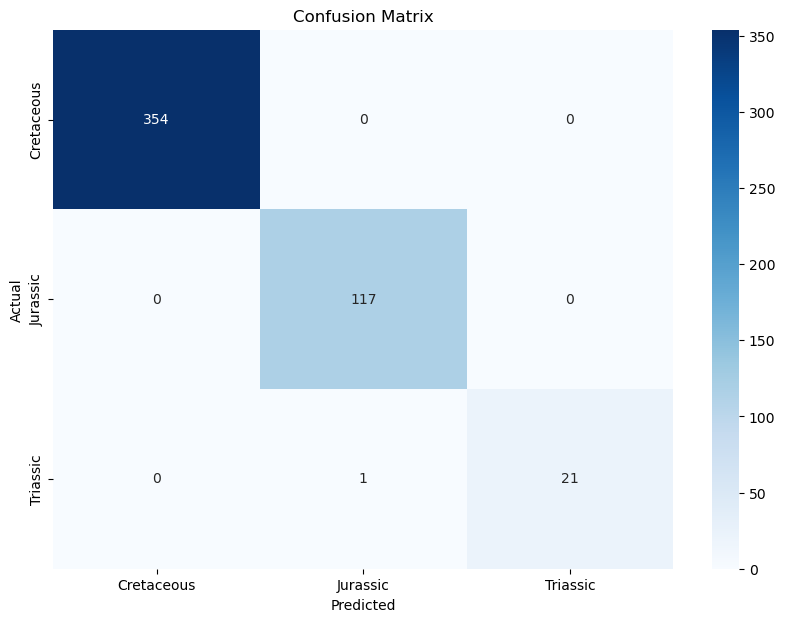

In [7]:
# Plot the results
conf_mat = confusion_matrix(y_test, predictions)
conf_mat_df = pd.DataFrame(conf_mat, index=label_encoder_geological_time_period.classes_, columns=label_encoder_geological_time_period.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()